<a href="https://colab.research.google.com/github/deekshant1/Tensorflow-Specialization-Coursera/blob/master/Natural%20Language%20Processing/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-08-28 13:08:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.203.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-28 13:08:24 (84.1 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer
model.add(Bidirectional(LSTM(100, return_sequences=True)))# An LSTM Layer
model.add(Dropout(0.2))# A dropout layer
model.add(Bidirectional(LSTM(64)))# Another LSTM Layer
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))# A Dense Layer
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])# Pick a loss function and an optimizer
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 200)           160800    
_________________________________________________________________
dropout (Dropout)            (None, 10, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               135680    
_________________________________________________________________
dense (Dense)                (None, 1605)              207045    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 5,981,491
Trainable params: 5,981,491
Non-trainable params: 0
______________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 27ms/step - loss: 6.9278 - accuracy: 0.0200
Epoch 2/100
484/484 [==============================] - 13s 27ms/step - loss: 6.5048 - accuracy: 0.0238
Epoch 3/100
484/484 [==============================] - 13s 27ms/step - loss: 6.4093 - accuracy: 0.0244
Epoch 4/100
484/484 [==============================] - 13s 28ms/step - loss: 6.2896 - accuracy: 0.0283
Epoch 5/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1877 - accuracy: 0.0353
Epoch 6/100
484/484 [==============================] - 13s 27ms/step - loss: 6.0994 - accuracy: 0.0376
Epoch 7/100
484/484 [==============================] - 13s 28ms/step - loss: 6.0085 - accuracy: 0.0400
Epoch 8/100
484/484 [==============================] - 13s 27ms/step - loss: 5.9160 - accuracy: 0.0421
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 5.8269 - accuracy: 0.0473
Epoch 10/100
484/484 [==============================] - 14s 28ms/step - l

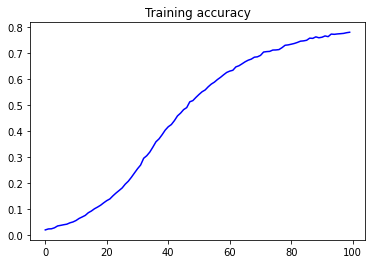

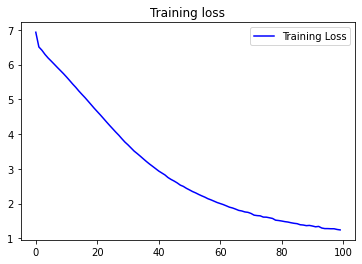

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope that such ever dwell still ' hate hate lack thence dumb none blind blind gone will i in thine brow view set days still grow back still live quite loved from ill before it shine more say take thine thy face exceeds show thy heart in youth from thee live for told her dumb false kind with fears not will do find it brought my side time's several plot dwells dwells bow due days prove none days prove thee lack time doth gone in thine and that in one brow hate ' die thee ' hate due me in love
